In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def multitime_to_pd(list):
    df = pd.DataFrame(columns = ['Mean', 'Std.Dev.', 'Min', 'Median', 'Max'], index = ['real', 'user', 'sys'])
    for i in range (3, 6):
        row = re.sub(' +', ' ', list[i]).split(" ")[:6]
        df.loc[row[0]] = row[1:]
    return(df)

def plot_times(df):
    ax = df.plot(x='name', y='time', kind='bar')
    ax.set_xlabel(None)
    ax.set_ylabel('Execution time (s)')
    ax.set_title('Execution Time Comparison')
    for i, v in enumerate(df['time']):
        ax.text(i, v, str(v), ha='center', va='bottom')
    plt.show()

In [3]:
!export N_RUNS=3

Csmall = !multitime -q -n 3 ./Benchmarks/Caesar-cipher/Small_dataset/C/caesar-cipher_runSMALL
Cmedium = !multitime -q -n 3 ./Benchmarks/Caesar-cipher/Medium_dataset/C/caesar-cipher_runMEDIUM
Clarge = !multitime -q -n 3 ./Benchmarks/Caesar-cipher/Large_dataset/C/caesar-cipher_runLARGE
dfCsmall=multitime_to_pd(Csmall)
dfCmedium=multitime_to_pd(Cmedium)
dfClarge=multitime_to_pd(Clarge)


WASMsmall = !multitime -q -n 3 wasmtime ./Benchmarks/Caesar-cipher/Small_dataset/WASM/caesar-cipher_runSMALL.wasm
WASMmedium = !multitime -q -n 3 wasmtime ./Benchmarks/Caesar-cipher/Medium_dataset/WASM/caesar-cipher_runMEDIUM.wasm
WASMlarge = !multitime -q -n 3 wasmtime ./Benchmarks/Caesar-cipher/Large_dataset/WASM/caesar-cipher_runLARGE.wasm
dfWASMsmall=multitime_to_pd(WASMsmall)
dfWASMmedium=multitime_to_pd(WASMmedium)
dfWASMlarge=multitime_to_pd(WASMlarge)

JSsmall = !multitime -q -n 3 node ./Benchmarks/Caesar-cipher/Small_dataset/WASM+JS/caesar-cipher_runSMALL.js
JSmedium = !multitime -q -n 3 node ./Benchmarks/Caesar-cipher/Medium_dataset/WASM+JS/caesar-cipher_runMEDIUM.js
JSlarge = !multitime -q -n 3 node ./Benchmarks/Caesar-cipher/Large_dataset/WASM+JS/caesar-cipher_runLARGE.js
dfJSsmall=multitime_to_pd(JSsmall)
dfJSmedium=multitime_to_pd(JSmedium)
dfJSlarge=multitime_to_pd(JSlarge)

In [36]:
#print("C small:"); print(dfCsmall); print("\nC medium:"); print(dfCmedium); print("\nC large:"); print(dfClarge)

#print("\nWASM small:"); print(dfWASMsmall); print("\nWASM medium:"); print(dfWASMmedium); print("\nWASM large:"); print(dfWASMlarge)

#print("\nJS small:"); print(dfJSsmall); print("\nJS medium:"); print(dfJSmedium); print("\nJS large:"); print(dfJSlarge)

         name   time
0      Csmall  0.007
1     Cmedium  0.010
2      Clarge  0.017
3   WASMsmall  0.029
4  WASMmedium  0.049
5   WASMlarge  0.081
6     JSsmall  0.506
7    JSmedium  1.202
8     JSlarge  1.948


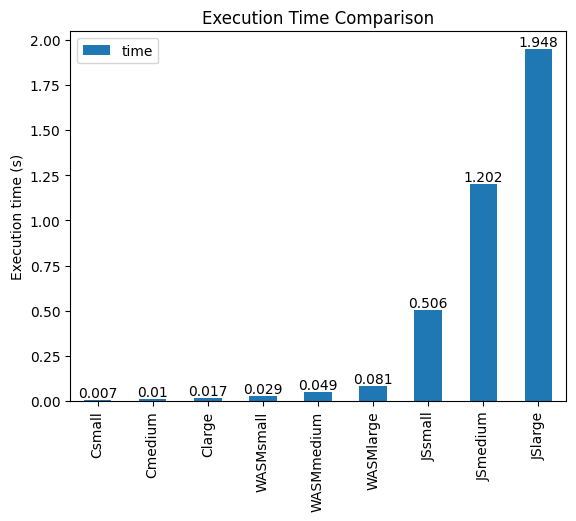

In [37]:
# Extract the execution time values that you want to plot
name_values = ['Csmall', 'Cmedium', 'Clarge', 'WASMsmall', 'WASMmedium', 'WASMlarge', 'JSsmall', 'JSmedium', 'JSlarge']

time_values = [float(dfCsmall.loc['real', 'Mean']), float(dfCmedium.loc['real', 'Mean']), float(dfClarge.loc['real', 'Mean']), 
               float(dfWASMsmall.loc['real', 'Mean']), float(dfWASMmedium.loc['real', 'Mean']), float(dfWASMlarge.loc['real', 'Mean']),
               float(dfJSsmall.loc['real', 'Mean']), float(dfJSmedium.loc['real', 'Mean']), float(dfJSlarge.loc['real', 'Mean']),
              ]

# Create a new dataframe to store the extracted values
df = pd.DataFrame({'name': name_values, 'time': time_values})
print(df)
plot_times(df)



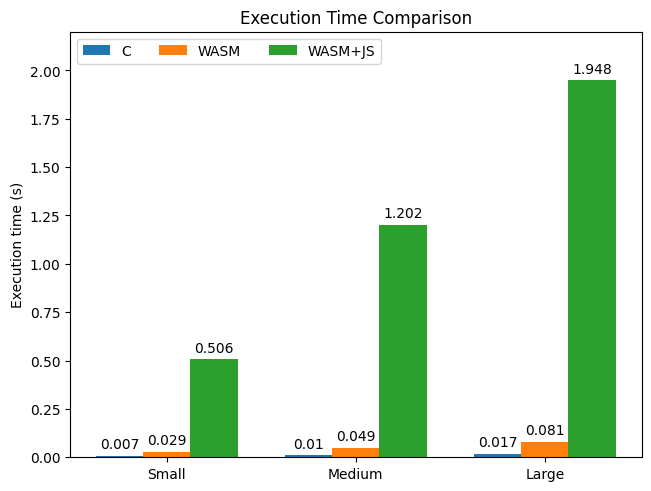

In [38]:
bench_size = ("Small", "Medium", "Large")
execution = {
    'C': (float(dfCsmall.loc['real', 'Mean']), float(dfCmedium.loc['real', 'Mean']), float(dfClarge.loc['real', 'Mean'])),
    'WASM': (float(dfWASMsmall.loc['real', 'Mean']), float(dfWASMmedium.loc['real', 'Mean']), float(dfWASMlarge.loc['real', 'Mean'])),
    'WASM+JS': (float(dfJSsmall.loc['real', 'Mean']), float(dfJSmedium.loc['real', 'Mean']), float(dfJSlarge.loc['real', 'Mean'])),
}

#place group labels
x = np.arange(len(bench_size))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in execution.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Execution time (s)')
ax.set_title('Execution Time Comparison')
ax.set_xticks(x + width, bench_size)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 2.2)

plt.show()
